In [67]:
# PyTorch
from torchvision import transforms, datasets, models
import torch
from torch import optim
from torch.utils.data import DataLoader, sampler
import torch.nn as nn


In [68]:
model = models.vgg16(pretrained=True)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [69]:
model.classifier[6]

Linear(in_features=4096, out_features=1000, bias=True)

In [70]:
from torchsummary import summary
summary(model, input_size=(3, 224, 224), batch_size=3, device='cpu')


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [3, 64, 224, 224]           1,792
              ReLU-2          [3, 64, 224, 224]               0
            Conv2d-3          [3, 64, 224, 224]          36,928
              ReLU-4          [3, 64, 224, 224]               0
         MaxPool2d-5          [3, 64, 112, 112]               0
            Conv2d-6         [3, 128, 112, 112]          73,856
              ReLU-7         [3, 128, 112, 112]               0
            Conv2d-8         [3, 128, 112, 112]         147,584
              ReLU-9         [3, 128, 112, 112]               0
        MaxPool2d-10           [3, 128, 56, 56]               0
           Conv2d-11           [3, 256, 56, 56]         295,168
             ReLU-12           [3, 256, 56, 56]               0
           Conv2d-13           [3, 256, 56, 56]         590,080
             ReLU-14           [3, 256,

In [71]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [72]:
#drop the lasty layer
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
        
    def forward(self, x):
        return x

model.classifier= Identity()


In [73]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

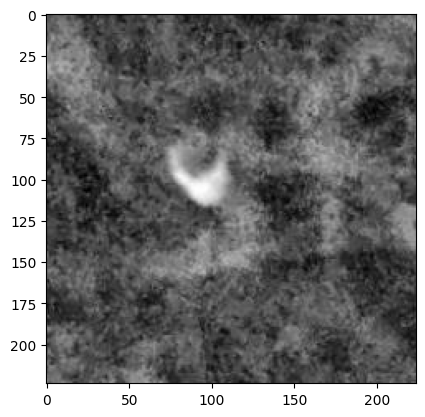

In [74]:
# single image

from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

img = Image.open('../data/processed/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.429733613616775521134752460435327912/1-295.jpg')

plt.imshow(img, cmap='gray')
plt.show()


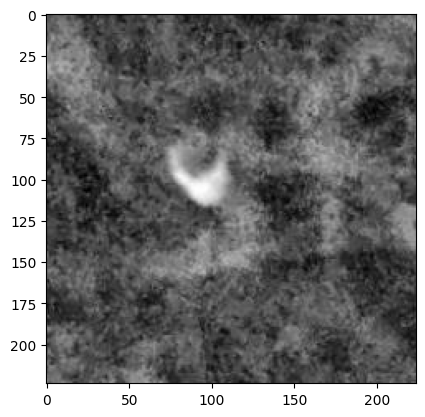

tensor([[0., 0., 0.,  ..., 0., 0., 0.]], grad_fn=<ViewBackward0>)

In [75]:
#test the model
model.eval()
#tensor without transformation

transform = transforms.Compose([
    transforms.ToTensor(),
])

img_tensor = transform(img)
plt.imshow(img_tensor.permute(1, 2, 0), cmap='gray')
plt.show()

img_tensor = img_tensor.unsqueeze(0)
output = model(img_tensor)
output



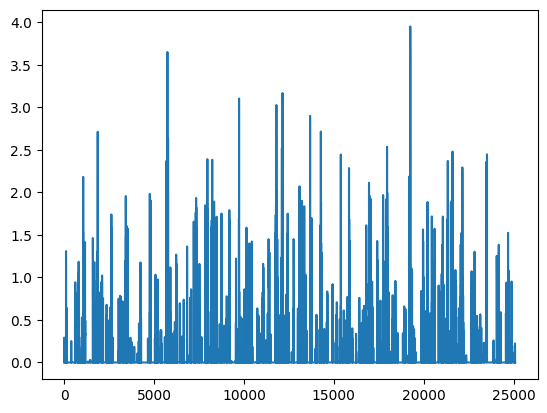

In [76]:
#plot the output 
import numpy as np
import matplotlib.pyplot as plt

output = output.detach().numpy()
output = np.squeeze(output)
plt.plot(output)
plt.show()




In [87]:
import timm

class ViTPlusPlus(nn.Module):
    def __init__(self, img_size=224, patch_size=16, num_patches=196, embed_dim=512, num_blocks=8, num_heads=8):
        super(ViTPlusPlus, self).__init__()
        
        self.patch_embed = nn.Conv2d(3, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.num_patches = (img_size // patch_size) ** 2
        
        self.position_embed = nn.Parameter(torch.zeros(1, self.num_patches, embed_dim))
        self.dropout = nn.Dropout(0.1)
        
        self.transformer_encoder = nn.ModuleList([
            nn.TransformerEncoderLayer(
                d_model=embed_dim,
                nhead=num_heads,
                dim_feedforward=embed_dim * 4,
                dropout=0.1,
                activation='gelu'
            ) for _ in range(num_blocks)
        ])
        
        self.norm = nn.LayerNorm(embed_dim)
        self.global_pooling = nn.AdaptiveAvgPool1d(1)
    
    def forward(self, x):
        # Patch embedding
        x = self.patch_embed(x)  # Shape: (batch_size, embed_dim, num_patches ** 0.5, num_patches ** 0.5)
        x = x.flatten(2)  # Shape: (batch_size, embed_dim, num_patches)
        x = x.transpose(1, 2)  # Shape: (batch_size, num_patches, embed_dim)
        
        # Add position embeddings
        x = x + self.position_embed
        x = self.dropout(x)
        
        # Pass through Transformer encoder layers
        for layer in self.transformer_encoder:
            x = layer(x)
        
        # Layer normalization
        x = self.norm(x)
        
        # Global pooling
        x = x.permute(0, 2, 1)
        x = self.global_pooling(x)
        x = torch.flatten(x, 1)
        
        return x

In [78]:
class CNNBranch(nn.Module): # VGG16 Working
    def __init__(self):
        super(CNNBranch, self).__init__()
        vgg = models.vgg16(pretrained=True)
        self.features = vgg.features
        self.global_pooling = nn.AdaptiveAvgPool2d((1, 1))
    
    def forward(self, x):
        x = self.features(x)
        x = self.global_pooling(x)
        x = torch.flatten(x, 1)
        return x

In [99]:
class HybridModel(nn.Module):
    def __init__(self, num_classes=1, embed_dim=512):
        super(HybridModel, self).__init__()
        self.cnn_branch = CNNBranch()
        self.vit_branch = ViTPlusPlus(embed_dim=embed_dim)
        self.fc = nn.Sequential(
            nn.Linear(512 + embed_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        cnn_features = self.cnn_branch(x)
        vit_features = self.vit_branch(x)
        features = torch.cat((cnn_features, vit_features), dim=1)
        out = self.fc(features)
        return out

In [98]:
model = HybridModel()
#ytest the model
model.eval()
#tensor without transformation

transform = transforms.Compose([
    transforms.ToTensor(),
])

img_tensor = transform(img)

img_tensor = img_tensor.unsqueeze(0)
output = model(img_tensor)
output

tensor([[0.5173, 0.5552]], grad_fn=<SigmoidBackward0>)